In [18]:
import pandas as pd
df = pd.read_csv('data.csv')

In [19]:
# Remove commas and dollar signs, then convert to numeric
df['Avg Monthly Sent Emails \n(Nov-Dec)'] = df['Avg Monthly Sent Emails \n(Nov-Dec)'].str.replace(',', '').astype(int)
df['Avg Mthly Sales $ \n(via Email Campaigns)'] = df['Avg Mthly Sales $ \n(via Email Campaigns)'].str.replace('[$,]', '', regex=True).astype(float)
df['Avg Mthly Sales $\n(Total)'] = df['Avg Mthly Sales $\n(Total)'].str.replace('[$,]', '', regex=True).astype(float)

In [20]:
# Calculate open rates for Jan-Oct, Nov-Dec, and total
df['Open Rate Jan-Oct'] = df['Avg Monthly Opened Emails'] / df['Avg Monthly Sent Emails\n(Jan-Oct)']
df['Open Rate Nov-Dec'] = df['Avg Monthly Opened Emails'] / df['Avg Monthly Sent Emails \n(Nov-Dec)']
df['Open Rate Total'] = df['Avg Monthly Opened Emails'] / (
    df['Avg Monthly Sent Emails\n(Jan-Oct)'] + df['Avg Monthly Sent Emails \n(Nov-Dec)']
)

In [21]:
df_shopify = df[df['Email Provider'] == 'Shopify Email'].copy()
df_shopify['Cost_for_Mech'] = df_shopify['Avg Monthly Sent Emails \n(Nov-Dec)'] * 0.0003
df_shopify['Revenue_Shopify'] = df_shopify['Avg Mthly Sales $ \n(via Email Campaigns)'] * 0.005

df_shopify.head()

,Customer ID,Avg Monthly Sent Emails\n(Jan-Oct),Avg Monthly Sent Emails \n(Nov-Dec),Avg Monthly Subscribers\n,Email Provider,Avg Monthly Opened Emails,Avg Mthly Sales $ \n(via Email Campaigns),Avg Mthly Sales $\n(Total),Open Rate Jan-Oct,Open Rate Nov-Dec,Open Rate Total,Cost_for_Mech,Revenue_Shopify
3,4,2074,2489,1411,Shopify Email,186.66,672.0,22400.0,0.09,0.074994,0.040907,0.7467,3.360
11,12,6964,8844,6628,Shopify Email,487.48,4580.0,76333.0,0.07,0.055120,0.030838,2.6532,22.900
15,16,48982,82290,11617,Shopify Email,4408.38,2726.0,45433.0,0.09,0.053571,0.033582,24.6870,13.630
18,19,1201,1333,1215,Shopify Email,84.07,23.0,460.0,0.07,0.063068,0.033177,0.3999,0.115
20,21,3716,6614,7318,Shopify Email,185.80,2771.0,92367.0,0.05,0.028092,0.017986,1.9842,13.855


In [25]:
# Add new columns to df_shopify
df_shopify['Revenue per Email Sent'] = df_shopify['Avg Mthly Sales $ \n(via Email Campaigns)'] / df_shopify['Avg Monthly Sent Emails \n(Nov-Dec)']
df_shopify['Revenue per Subscriber'] = df_shopify['Avg Mthly Sales $ \n(via Email Campaigns)'] / df_shopify['Avg Monthly Subscribers\n']
df_shopify['Cost per Email Sent'] = df_shopify['Cost_for_Mech'] / df_shopify['Avg Monthly Sent Emails \n(Nov-Dec)']
df_shopify['Gross Margin (Email)'] = (df_shopify['Email-attributed Payment Revenue'] - df_shopify['Cost_for_Mech']) / df_shopify['Email-attributed Payment Revenue']

df_shopify.head()

,Customer ID,Avg Monthly Sent Emails\n(Jan-Oct),Avg Monthly Sent Emails \n(Nov-Dec),Avg Monthly Subscribers\n,Email Provider,Avg Monthly Opened Emails,Avg Mthly Sales $ \n(via Email Campaigns),Avg Mthly Sales $\n(Total),Open Rate Jan-Oct,Open Rate Nov-Dec,Open Rate Total,Cost_for_Mech,Revenue_Shopify,Revenue per Email Sent,Revenue per Subscriber,Email-attributed Payment Revenue,Cost per Email Sent,Gross Margin (Email),Seasonal Lift,Avg Emails Sent Growth
3,4,2074,2489,1411,Shopify Email,186.66,672.0,22400.0,0.09,0.074994,0.040907,0.7467,3.360,0.269988,0.476258,658.56,0.0003,0.998866,1.200096,0.200096
11,12,6964,8844,6628,Shopify Email,487.48,4580.0,76333.0,0.07,0.055120,0.030838,2.6532,22.900,0.517865,0.691008,4488.40,0.0003,0.999409,1.269960,0.269960
15,16,48982,82290,11617,Shopify Email,4408.38,2726.0,45433.0,0.09,0.053571,0.033582,24.6870,13.630,0.033127,0.234656,2671.48,0.0003,0.990759,1.680005,0.680005
18,19,1201,1333,1215,Shopify Email,84.07,23.0,460.0,0.07,0.063068,0.033177,0.3999,0.115,0.017254,0.018930,22.54,0.0003,0.982258,1.109908,0.109908
20,21,3716,6614,7318,Shopify Email,185.80,2771.0,92367.0,0.05,0.028092,0.017986,1.9842,13.855,0.418960,0.378655,2715.58,0.0003,0.999269,1.779871,0.779871


In [23]:
# Calculate Seasonal Lift and Avg Emails Sent Growth for Shopify Email customers
df_shopify['Seasonal Lift'] = df_shopify['Avg Monthly Sent Emails \n(Nov-Dec)'] / df_shopify['Avg Monthly Sent Emails\n(Jan-Oct)']
df_shopify['Avg Emails Sent Growth'] = (df_shopify['Avg Monthly Sent Emails \n(Nov-Dec)'] - df_shopify['Avg Monthly Sent Emails\n(Jan-Oct)']) / df_shopify['Avg Monthly Sent Emails\n(Jan-Oct)']
df_shopify[['Seasonal Lift', 'Avg Emails Sent Growth']].head()

,Seasonal Lift,Avg Emails Sent Growth
3,1.200096,0.200096
11,1.269960,0.269960
15,1.680005,0.680005
18,1.109908,0.109908
20,1.779871,0.779871


In [27]:
df_non_shopify = df[df['Email Provider'] != 'Shopify Email'].copy()
df_non_shopify['Cost_for_Mech'] = df_non_shopify['Avg Monthly Sent Emails \n(Nov-Dec)'] * 0.0003
df_non_shopify['Revenue_Shopify'] = df_non_shopify['Avg Mthly Sales $ \n(via Email Campaigns)'] * 0.005

df_non_shopify['Revenue per Email Sent'] = df_non_shopify['Avg Mthly Sales $ \n(via Email Campaigns)'] / df_non_shopify['Avg Monthly Sent Emails \n(Nov-Dec)']
df_non_shopify['Revenue per Subscriber'] = df_non_shopify['Avg Mthly Sales $ \n(via Email Campaigns)'] / df_non_shopify['Avg Monthly Subscribers\n']
df_non_shopify['Cost per Email Sent'] = df_non_shopify['Cost_for_Mech'] / df_non_shopify['Avg Monthly Sent Emails \n(Nov-Dec)']

df_non_shopify['Seasonal Lift'] = df_non_shopify['Avg Monthly Sent Emails \n(Nov-Dec)'] / df_non_shopify['Avg Monthly Sent Emails\n(Jan-Oct)']
df_non_shopify['Avg Emails Sent Growth'] = (df_non_shopify['Avg Monthly Sent Emails \n(Nov-Dec)'] - df_non_shopify['Avg Monthly Sent Emails\n(Jan-Oct)']) / df_non_shopify['Avg Monthly Sent Emails\n(Jan-Oct)']

df_non_shopify.head()

,Customer ID,Avg Monthly Sent Emails\n(Jan-Oct),Avg Monthly Sent Emails \n(Nov-Dec),Avg Monthly Subscribers\n,Email Provider,Avg Monthly Opened Emails,Avg Mthly Sales $ \n(via Email Campaigns),Avg Mthly Sales $\n(Total),Open Rate Jan-Oct,Open Rate Nov-Dec,Open Rate Total,Cost_for_Mech,Revenue_Shopify,Revenue per Email Sent,Revenue per Subscriber,Cost per Email Sent,Seasonal Lift,Avg Emails Sent Growth
0,1,86394,184019,14709,Third Party Solution,2591.82,53561.0,5356100.0,0.03,0.014085,0.009585,55.2057,267.805,0.291062,3.641376,0.0003,2.129997,1.129997
1,2,34309,63129,8209,Third Party Solution,343.09,16399.0,273317.0,0.01,0.005435,0.003521,18.9387,81.995,0.259770,1.997685,0.0003,1.840013,0.840013
2,3,42175,91942,17454,Third Party Solution,421.75,54440.0,907333.0,0.01,0.004587,0.003145,27.5826,272.200,0.592112,3.119056,0.0003,2.180012,1.180012
4,5,20695,37872,11251,Third Party Solution,620.85,17800.0,445000.0,0.03,0.016393,0.010601,11.3616,89.000,0.470004,1.582082,0.0003,1.830007,0.830007
5,6,60062,125530,14648,Third Party Solution,1201.24,51035.0,2551750.0,0.02,0.009569,0.006472,37.6590,255.175,0.406556,3.484093,0.0003,2.090007,1.090007


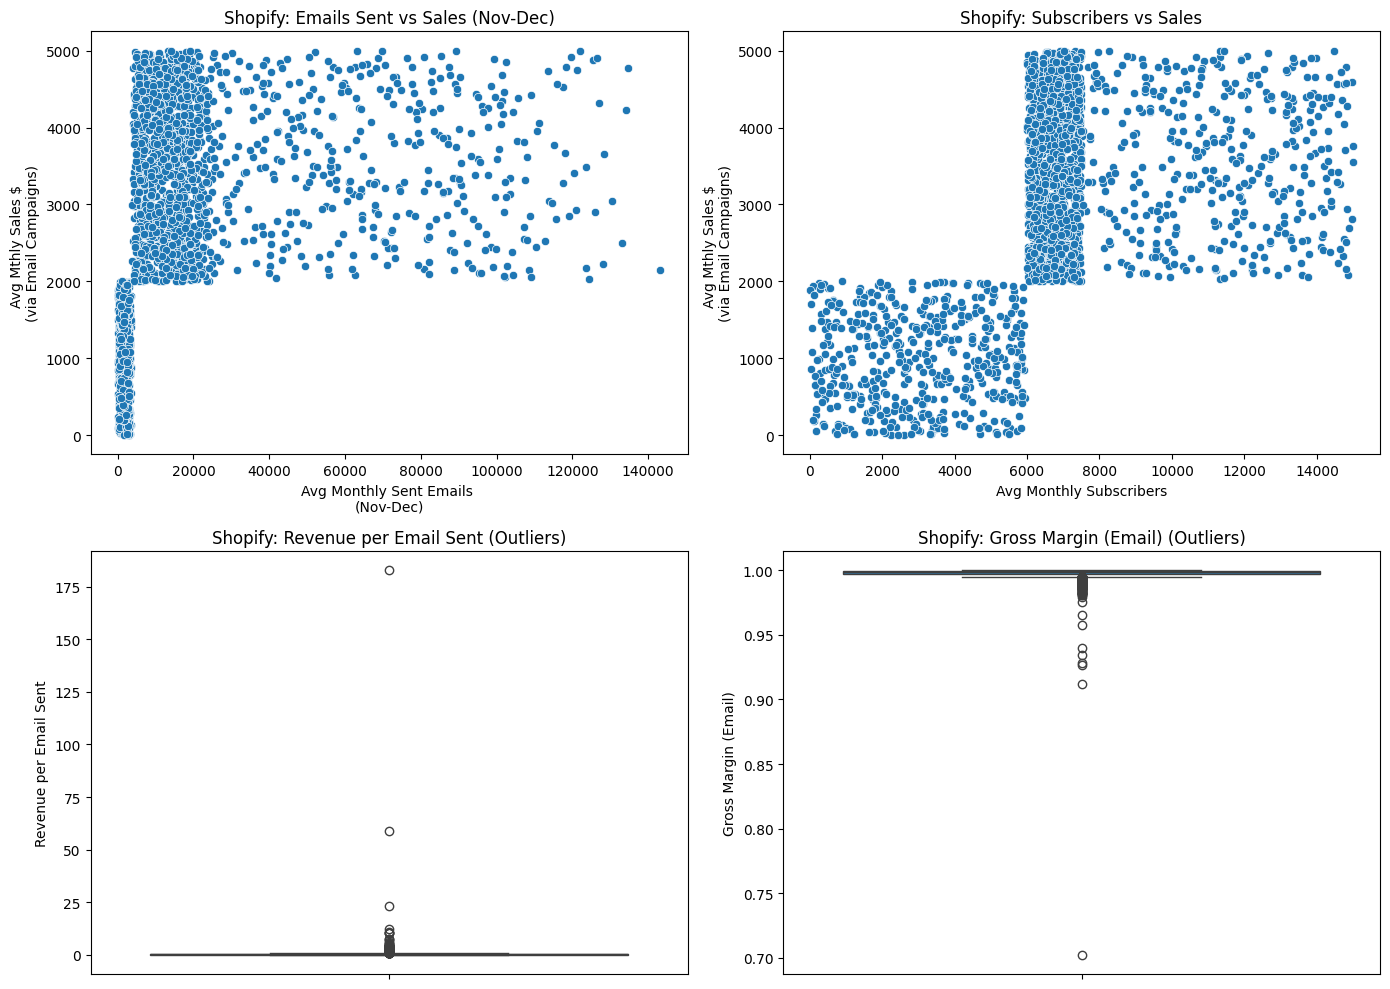

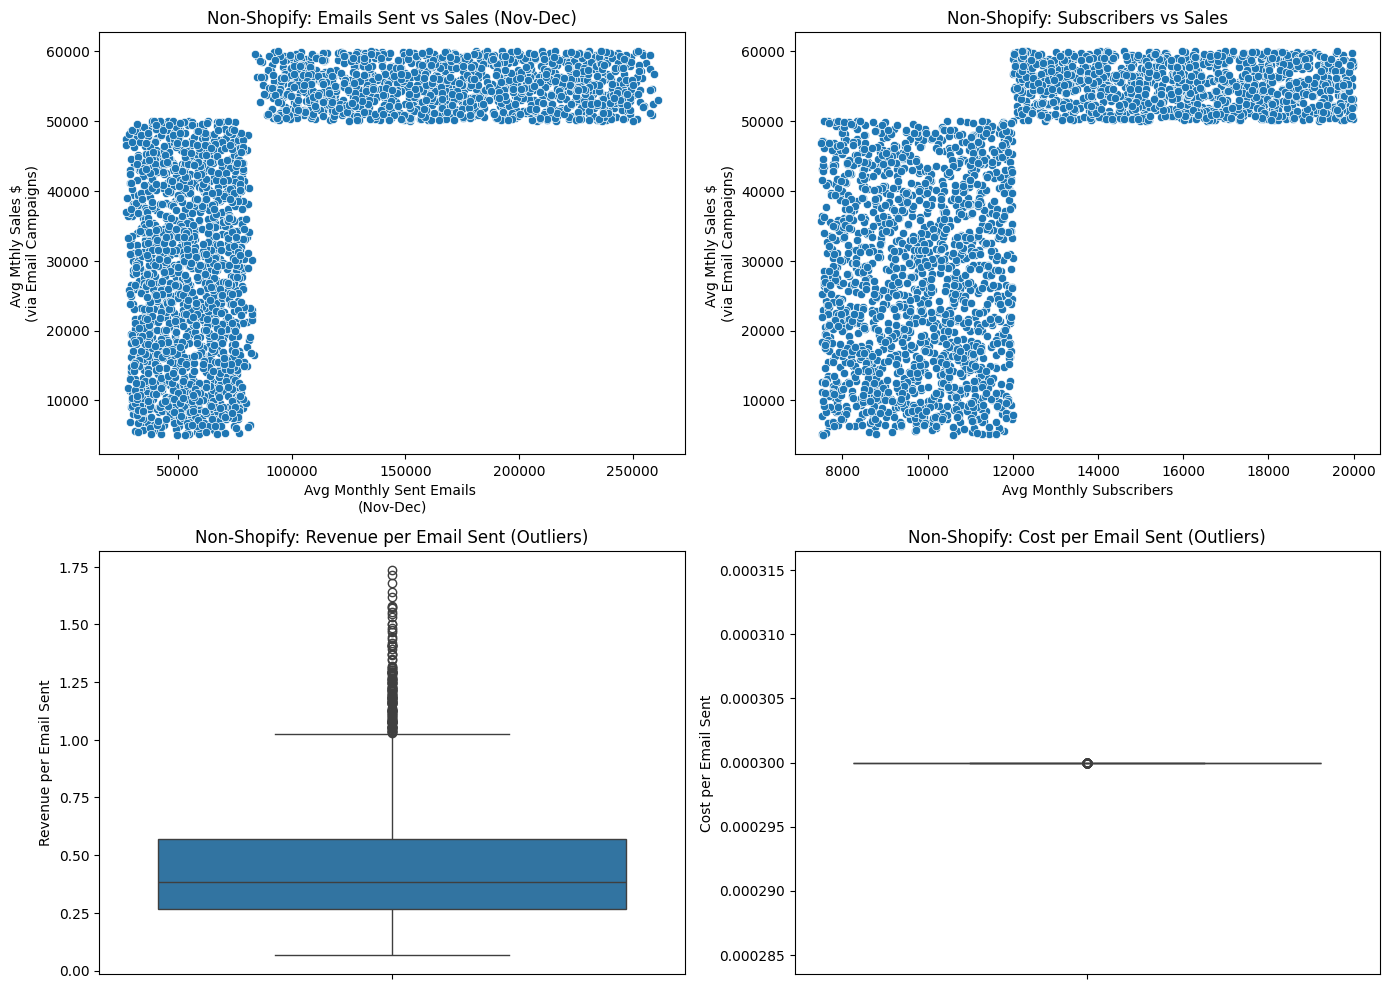

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore relationships for Shopify Email accounts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0,0], data=df_shopify, x='Avg Monthly Sent Emails \n(Nov-Dec)', y='Avg Mthly Sales $ \n(via Email Campaigns)')
axes[0,0].set_title('Shopify: Emails Sent vs Sales (Nov-Dec)')

sns.scatterplot(ax=axes[0,1], data=df_shopify, x='Avg Monthly Subscribers\n', y='Avg Mthly Sales $ \n(via Email Campaigns)')
axes[0,1].set_title('Shopify: Subscribers vs Sales')

sns.boxplot(ax=axes[1,0], data=df_shopify, y='Revenue per Email Sent')
axes[1,0].set_title('Shopify: Revenue per Email Sent (Outliers)')

sns.boxplot(ax=axes[1,1], data=df_shopify, y='Gross Margin (Email)')
axes[1,1].set_title('Shopify: Gross Margin (Email) (Outliers)')

plt.tight_layout()
plt.show()

# Explore relationships for Non-Shopify accounts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0,0], data=df_non_shopify, x='Avg Monthly Sent Emails \n(Nov-Dec)', y='Avg Mthly Sales $ \n(via Email Campaigns)')
axes[0,0].set_title('Non-Shopify: Emails Sent vs Sales (Nov-Dec)')

sns.scatterplot(ax=axes[0,1], data=df_non_shopify, x='Avg Monthly Subscribers\n', y='Avg Mthly Sales $ \n(via Email Campaigns)')
axes[0,1].set_title('Non-Shopify: Subscribers vs Sales')

sns.boxplot(ax=axes[1,0], data=df_non_shopify, y='Revenue per Email Sent')
axes[1,0].set_title('Non-Shopify: Revenue per Email Sent (Outliers)')

sns.boxplot(ax=axes[1,1], data=df_non_shopify, y='Cost per Email Sent')
axes[1,1].set_title('Non-Shopify: Cost per Email Sent (Outliers)')

plt.tight_layout()
plt.show()